#### Outlier?


An outlier is a data point which is significantly different from the remaining data. “An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.”

Statistics such as mean & variance are very susceptile to outliers

import numpy as np

X = [1,2,3,4,5,2,1,2]

np.mean(X)

2.5

X = [1,2,3,4,4,1,2,90]


np.mean(X)

13.375


See the difference, whereas 90 is OUTLIER value

Nature of Outliers

1) Geniune extremly high or low values

2) Introduced due to wrong measurement

3) Introduced by replacing NA by a value out of distribution 



How to preprocess Outliers?

1) Mean/Median imputation or random sampling

2) Discrestisation  --> Called Binning  (for example age variable can be group like : 0-20/21-40)

3) Discard the outliers:  Called Trimming
    
4) Top-coding , Bottom -Coding and Zero Coding : also known as Windsorization 

Here we are using    '''Extreme Value Analysis'''     to identify outliers

IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

Upper boundary = 75th quantile + (IQR * 3)

Lower boundary = 25th quantile - (IQR * 3)

Here we are using titanic dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/Users/nandrajog/Downloads/titanic.csv',low_memory=False)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Here something we should know


Top- coding or Bottom coding or any other feature pre-processing step hould be determined over the training set, and then transferred onto the test set.

In [3]:

# divide dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

#### FARE

Text(0, 0.5, 'Number of Passengers')

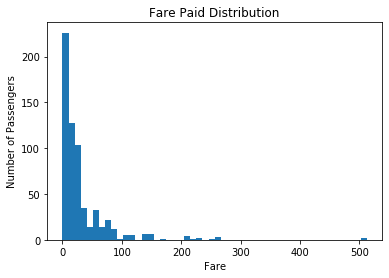

In [4]:
X_train['Fare'].plot(kind='hist',bins=50)
plt.title('Fare Paid Distribution')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

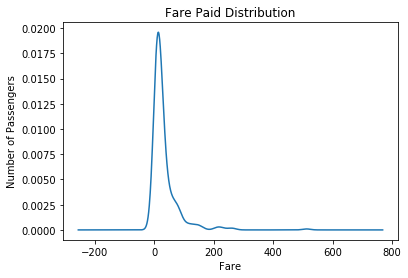

In [5]:
X_train['Fare'].plot(kind='kde')
plt.title('Fare Paid Distribution')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')

This above plot shows that the distribution is skewed the majority of passenger paid Fare between 0-100 & only few pasenger has paid more expensive fare

To identify outliers let's plot boxplot

Text(0, 0.5, 'Number of Passengers')

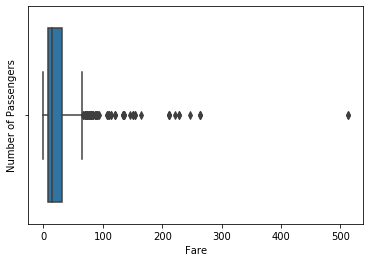

In [6]:
sns.boxplot(X_train['Fare'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')

The outliers, according to the above plot, lie all at the right side of the distribution. This is, some people paid extremely high prices for their tickets.

Therefore, in this variable, only extremely high values will affect the performance of our machine learning models, and we need to do therefore top-coding.

In [7]:
pd.DataFrame(X_train['Fare'].describe())

,Fare
count,623.000000
mean,32.458273
std,48.257658
min,0.000000
25%,7.925000
50%,15.000000
75%,31.387500
max,512.329200


In [8]:
#We need these values to implement Upper coding

In [9]:
#Let's perfrom Extreme Value Analysis
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
print(data.Fare.quantile(0.75))
print(data.Fare.quantile(0.25))
print("IQR",IQR)

upper_fence = X_train.Fare.quantile(0.75) + (IQR*3)
print("Upper_fence", upper_fence)

31.0
7.9104
IQR 23.0896
Upper_fence 100.6563


The upper boundary, above which every value is considered an outlier is a cost of 100 dollars for the Fare.

In [10]:
print("Total no. of passenger: {}".format(X_train.shape[0]))
print("Pasenger who paid more fare: {}".format(X_train[X_train.Fare>100].shape[0]))
print("Percentage of Outliers: {}".format((X_train[X_train.Fare>100].shape[0])/(X_train.shape[0])))

Total no. of passenger: 623
Pasenger who paid more fare: 36
Percentage of Outliers: 0.05778491171749599


Now let's perform Top-coding

In [15]:
X_train['Fare'] = np.where(X_train.Fare>100,100,X_train.Fare)
X_test['Fare'] = np.where(X_test.Fare>100,100,X_test.Fare)

/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### or this can be perfrom like this
X_train.loc[X_train.Fare > 100,'Fare'] == 100

X_test.loc[X_test.Fare > 100,'Fare'] == 100

In [19]:
pd.DataFrame(X_train.Fare.describe())

,Fare
count,623.000000
mean,27.650488
std,27.246454
min,0.000000
25%,7.925000
50%,15.000000
75%,31.387500
max,100.000000


In [20]:
pd.DataFrame(X_test.Fare.describe())

,Fare
count,268.000000
mean,25.578186
std,27.409097
min,0.000000
25%,7.895800
50%,13.000000
75%,29.268750
max,100.000000


This is how we can simply remove or replace outlier values 


If we observe in over Dataframe it shows that there are some passenger who paid 0 for their tickets






In [22]:
X_train[X_train.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S


Either they are illegeal people or maybe they do not survive so in that case we can assign the value to min just to make some business sense

In [29]:
pd.DataFrame(X_train[X_train['Fare'] !=0].min())

,0
PassengerId,1
Survived,0
Pclass,1
Name,"Abbing, Mr. Anthony"
Sex,female
Age,0.67
SibSp,0
Parch,0
Ticket,110152
Fare,5


Minimum Fare is 5